In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

df = pd.read_csv(r'C:\Users\singh\Documents\DATA ANALYTICS BOOTCAMP\data_jobs.csv')

# converting the job_posted_date object to datetime
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

# filtering the dataset only for the data analyst role
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [6]:
# creating a new col month
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# Explode the skills column and create a pivot
df_DA_explode = df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

# sort the skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

# use the month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format = '%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns = 'job_posted_month_no')

df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,0,0,0,0,0,1,1,0,0,0
Feb,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
Mar,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,1,0,0,0,0,0,0,0,0,1
Apr,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,0,0,0,0,1,0
May,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,1,0,0
Jun,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
Jul,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
Aug,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
Sep,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,1,0,0,0,0,0,0,0,0


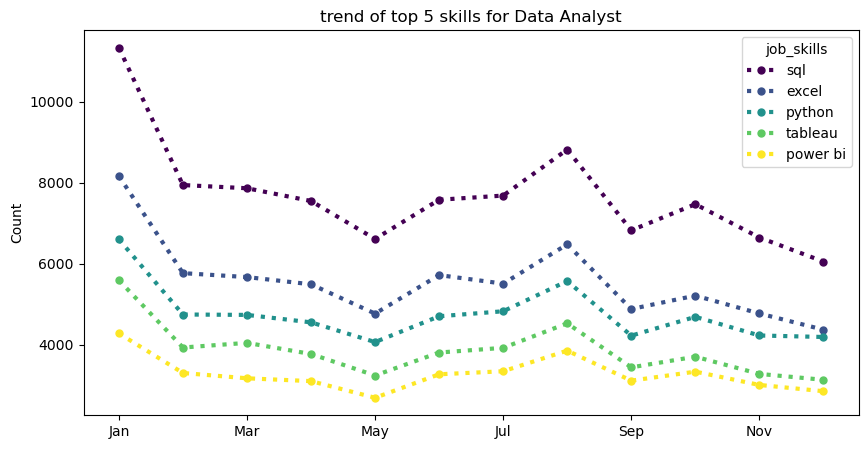

In [17]:
# plotting the top 5 skills, and customing the chart style
from matplotlib.lines import lineStyles


df_DA_pivot.iloc[:, :5].plot(
  kind='line',
  linewidth = '3',
  linestyle = ':',# options: '-', '--', '- ', ':'
  colormap= 'viridis', #options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
  marker = 'o',# options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4', .....
  markersize = 5,
  figsize= (10, 5))

plt.title('trend of top 5 skills for Data Analyst')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

**Customizing the scatter plot from chapter 15**

In [23]:
df_exploded = df_DA.explode('job_skills') 
df_exploded.groupby('job_skills').size()

# giving column name and the agg function using the tuple
skills_stats = df_exploded.groupby('job_skills').agg(
  skill_count = ('job_skills', 'count'),
  median_salary = ('salary_year_avg', 'median')
)

skills_stats = skills_stats.sort_values(by='skill_count', ascending=False).head(20)

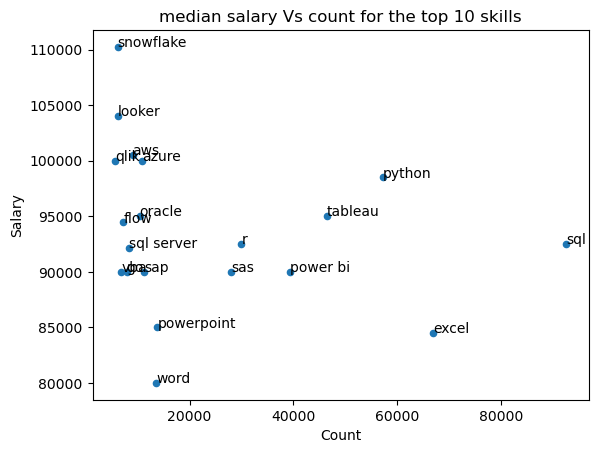

In [24]:
skills_stats.plot(kind='scatter', x = 'skill_count', y = 'median_salary')
plt.title('median salary Vs count for the top 10 skills')
plt.ylabel('Salary')
plt.xlabel('Count')

#Now to label the points on the graph

for i, txt in enumerate(skills_stats.index):
    plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], txt)

plt.show()

**To avoid the overlapping we will use the adjust text library**

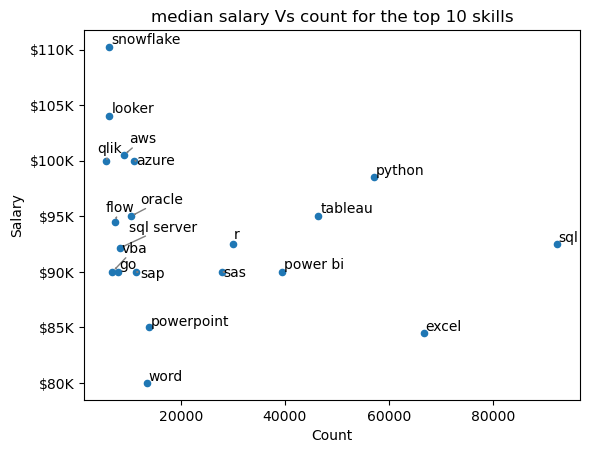

In [ ]:
from adjustText import adjust_text

skills_stats.plot(kind='scatter', x = 'skill_count', y = 'median_salary')

#Creating a list then adjusting the text
texts = []
for i, txt in enumerate(skills_stats.index):
    texts.append(plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], txt))

# Adjusting the text along with the arrow
adjust_text(texts, arrowprops = dict(arrowstyle = '->', color = 'gray', lw = 1))

#Changing the format of the y axis
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))


plt.title('median salary Vs count for the top 10 skills')
plt.ylabel('Salary')
plt.xlabel('Count')
plt.show()